# EDA Analysis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy import stats
import matplotlib.ticker as ticker
pd.set_option('display.max_columns', 50)

## Reading Data

In [2]:
df = pd.read_csv("nyc-rolling-sales.csv")

## First Look Of Data

### Extract general summary of data

In [4]:
# General overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [5]:
# Viewing the Top 5 Values
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [6]:
# Basic Statistics (Numeric Variables)
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [7]:
# Basic Statistics (Categorical Variables)
df.describe(include='object')

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548
unique,254,47,11,1,167,67563,3989,6062,5691,166,10008,364
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,,D4,131-05 40TH ROAD,,-,-,R4,-,2017-06-29 00:00:00
freq,3068,18235,38633,84548,12663,210,65496,26252,27612,12989,14561,544


## Data Analysis and Cleaning

### Dropping Unnecessary Columns

- Dropping the 'Unnamed: 0' column to clean up the DataFrame.
- The 'Unnamed: 0' column is usually created automatically during data import, especially when reading CSV files. 
- It often contains index values that are 
already present in the DataFrame's default index. 
- Removing this column eliminates redundancy and simplifies the dataset.

In [8]:
# Droping Unnamed: 0 column
df.drop(columns=['Unnamed: 0'], inplace=True)

### Convert Data Types

This function converts specific columns in a DataFrame to the correct data types.

- For numeric columns (like 'SALE PRICE', 'LAND SQUARE FEET', and 'GROSS SQUARE FEET'), it tries to convert them to numeric values. 
- If there are any invalid values that can't be converted, they will be set to NaN (Not a Number). Afterward, the column is converted to Int64 to handle any missing values appropriately.
- For the date column (e.g., 'SALE DATE'), the function converts it to a datetime format. If any invalid values are encountered, they will be set to NaT (Not a Time).

In [9]:
def convert_columns_type(df, numeric_columns, date_column):
    """
    Converts specified columns in a DataFrame to appropriate data types.

    For the numeric columns:
    - It attempts to convert the values to numeric types. If the conversion 
      fails (invalid values), these values will be set as NaN (Not a Number).
    - After that, NaN values are handled, and the column is converted to Int64 type.
    
    For the date column:
    - It converts the specified column to datetime format. If the conversion 
      fails, the invalid values will also be set as NaT (Not a Time).
    
    Args:
    df (pd.DataFrame): The DataFrame containing the columns to be converted.
    numeric_columns (list): List of numeric column names to be converted to Int64.
    date_column (str): The name of the column to be converted to datetime format.

    Returns:
    pd.DataFrame: The DataFrame with the specified columns converted to numeric and datetime types.
    """
    for column in numeric_columns:
        # Convert the column to numeric, invalid parsing will result in NaN, then convert to Int64
        df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    return df

# Example usage
columns_to_convert = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
df = convert_columns_type(df, columns_to_convert,'SALE DATE')

In [10]:
# Checking Data After Converting Data Types
df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,<NA>,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,<NA>,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17


### Checking Null Values

In [8]:
# Checking For Missing Values
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [9]:
# Calculate percentage of missing values
missing = df.isnull().mean().sort_values(ascending=False) * 100
missing

GROSS SQUARE FEET                 32.658372
LAND SQUARE FEET                  31.049818
SALE PRICE                        17.222170
BOROUGH                            0.000000
RESIDENTIAL UNITS                  0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
TAX CLASS AT TIME OF SALE          0.000000
YEAR BUILT                         0.000000
TOTAL UNITS                        0.000000
COMMERCIAL UNITS                   0.000000
ZIP CODE                           0.000000
NEIGHBORHOOD                       0.000000
APARTMENT NUMBER                   0.000000
ADDRESS                            0.000000
BUILDING CLASS AT PRESENT          0.000000
EASE-MENT                          0.000000
LOT                                0.000000
BLOCK                              0.000000
TAX CLASS AT PRESENT               0.000000
BUILDING CLASS CATEGORY            0.000000
SALE DATE                          0.000000
dtype: float64

### SALE PRICE Distribution Chart

- This chart is analyzed to understand the overall distribution and range of the 'SALE PRICE' data.
- It helps to identify patterns such as skewness, outliers, and the concentration of most sale prices.
- The addition of a KDE curve further allows us to visualize the probability density and provides 
insights into the general shape of the data, which is critical for data analysis and modeling.

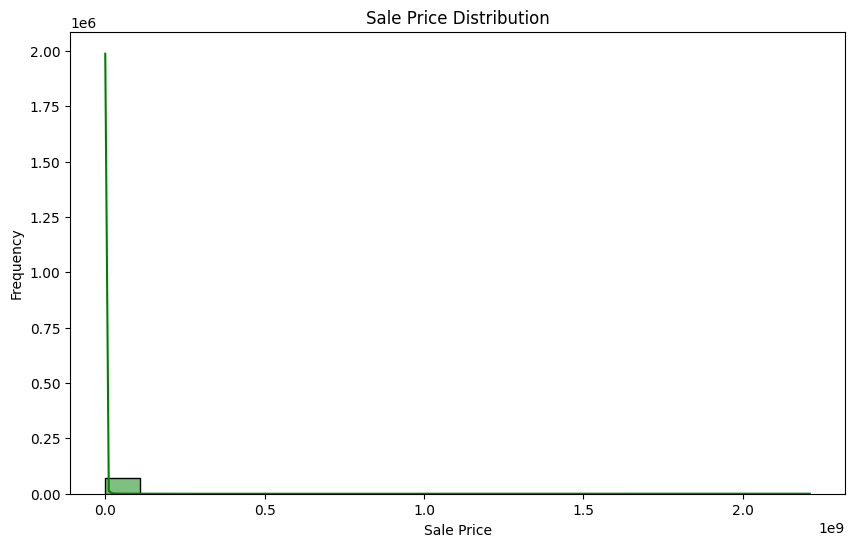

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SALE PRICE'].dropna(), bins=20, kde=True, color='green')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

### SALE PRICE Distribution Chart After removing Outliers

- After observing outliers in the previous distribution chart, this function was implemented 
to remove outliers from the specified numeric columns. 
- Outliers can distort the visual representation and analysis, making the graph unclear. 
- By removing them, we aim to clean the data and improve the accuracy of further analysis and visualizations.

#### Removing Outliers

In [ ]:
def remove_outliers(df, columns):
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
clean_df = remove_outliers(df, numeric_columns)

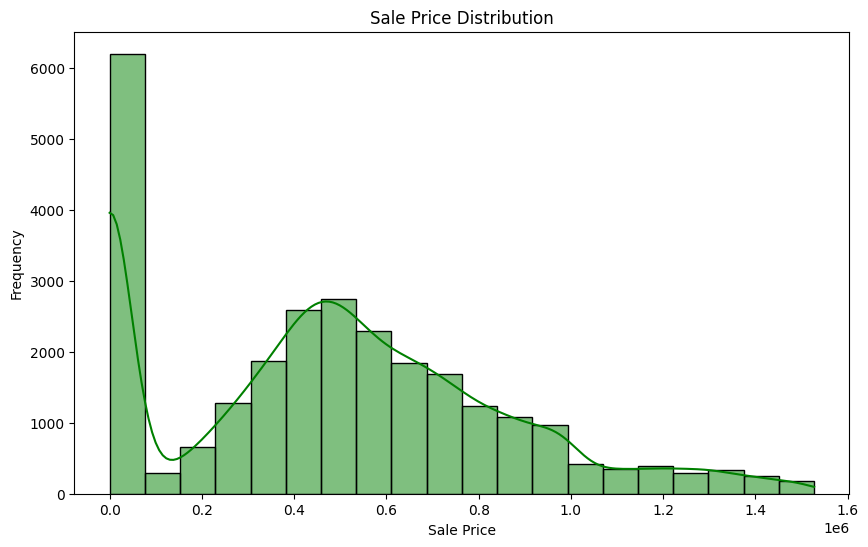

In [17]:
# 'SALE PRICE' Distribution Chart
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['SALE PRICE'].dropna(), bins=20, kde=True, color='green')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

### Average Sale Price by Neighborhood (Without Outlier)

- This bar chart visualizes the average sale price of properties in different neighborhoods.
- By grouping the data by 'NEIGHBORHOOD' and calculating the mean sale price, we can easily 
compare which neighborhoods have higher or lower property values.
- The neighborhoods are sorted in descending order based on their average sale price, providing 
a clear view of price distribution across various locations. 
- This analysis helps in understanding property market trends within different areas.

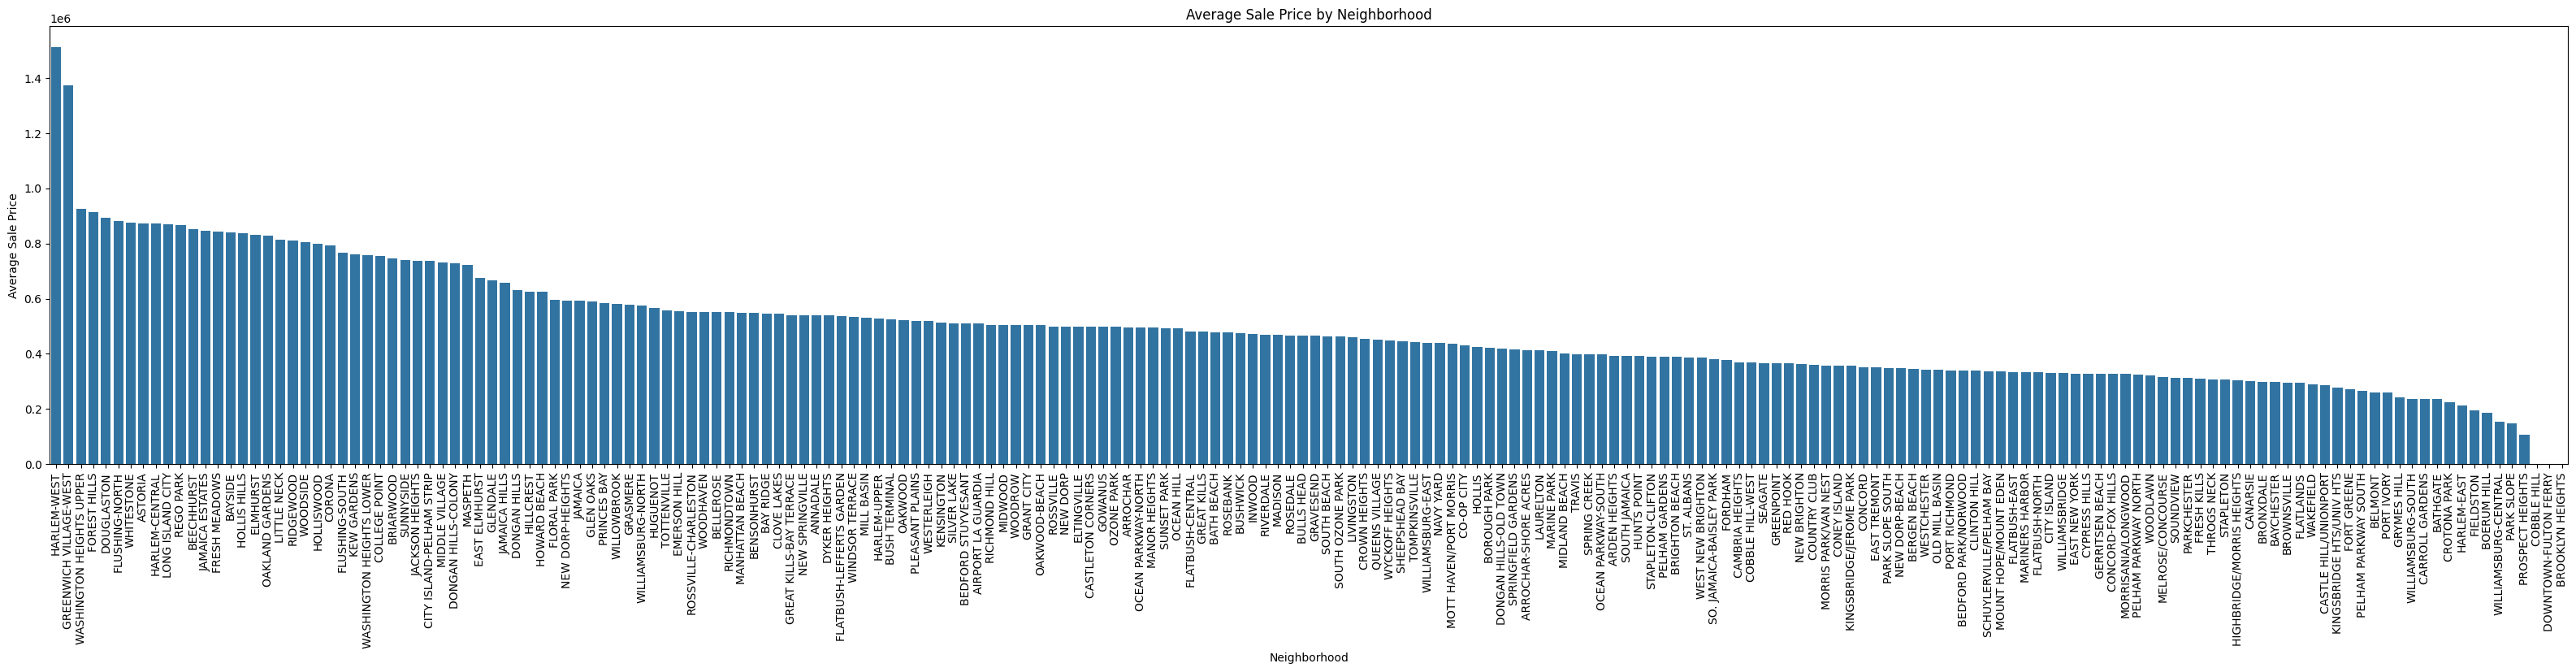

In [18]:
# Average Sale Price by Neighborhood
neighborhood_avg_price = clean_df.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().sort_values(ascending=False)
plt.figure(figsize=(40, 7))
sns.barplot(x=neighborhood_avg_price.index, y=neighborhood_avg_price.values)
plt.title('Average Sale Price by Neighborhood')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.show()

### Average Sale Price by Neighborhood (Including Outliers)

- This line plot shows the average sale price for properties across different neighborhoods, 
including outliers. 
- By grouping the data by 'NEIGHBORHOOD' and calculating the average sale 
price, we can observe the variation in property prices across different areas.
- The graph helps in identifying neighborhoods with significantly higher or lower property 
values. 
- The inclusion of outliers may influence these averages, showing a broader perspective 
of price fluctuations in the dataset.

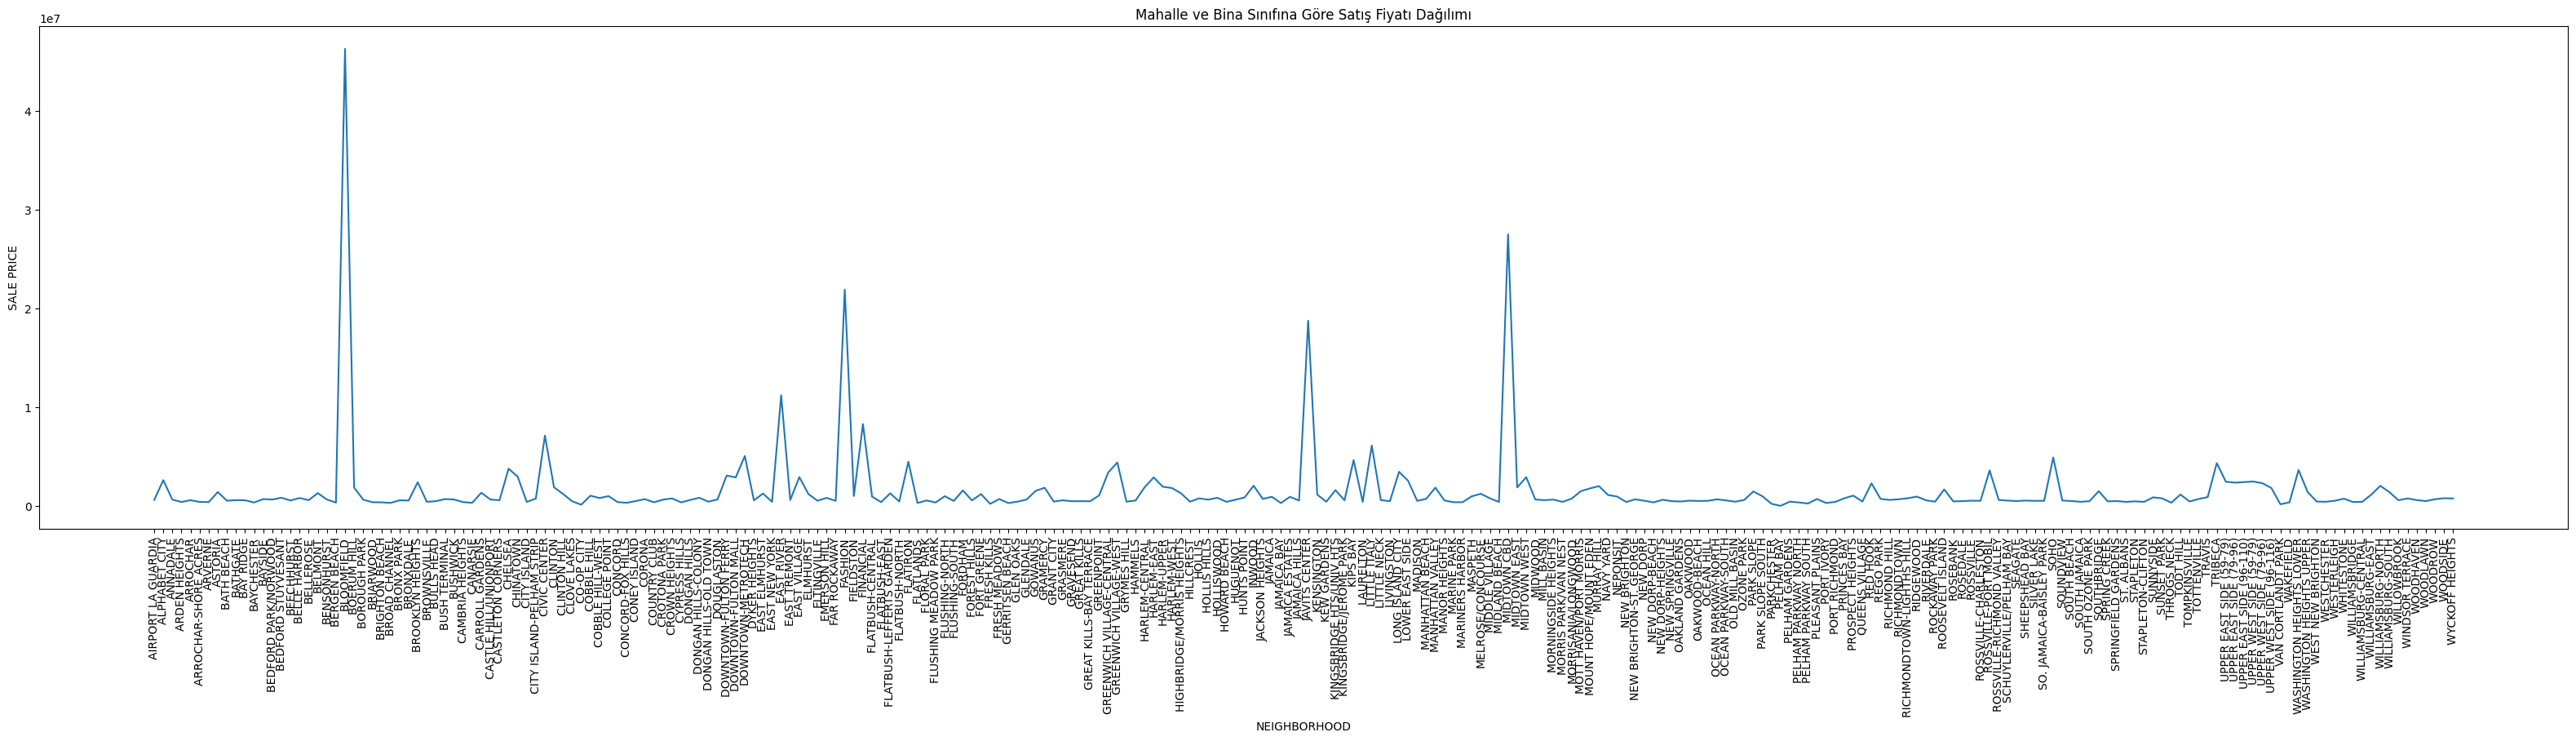

In [19]:
plt.figure(figsize=(40, 8))
avg_neigh_prices = df.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index()
sns.lineplot(x='NEIGHBORHOOD', y='SALE PRICE', data=avg_neigh_prices)
plt.title('Mahalle ve Bina Sınıfına Göre Satış Fiyatı Dağılımı')
plt.xticks(rotation=90)
plt.show()

### Neighborhoods with the Highest and Lowest Sale Prices

- This code extracts and displays the top 5 neighborhoods with the highest and lowest sale prices.
- Using the 'nlargest' function, the top 5 highest sale prices are selected along with their respective neighborhoods. Similarly, the 'nsmallest' function selects the lowest sale prices.
- This helps identify which neighborhoods have the most expensive and least expensive properties.

In [11]:
highest_sale_price = df.nlargest(5, 'SALE PRICE')[['NEIGHBORHOOD', 'SALE PRICE']]
lowest_sale_price = df.nsmallest(5, 'SALE PRICE')[['NEIGHBORHOOD', 'SALE PRICE']]

print("\nThe 5 Neighborhoods with the Highest Sales Prices:")
print(highest_sale_price)

print("\nThe 5 Neighborhoods with the Lowest Sales Prices:")
print(lowest_sale_price)


The 5 Neighborhoods with the Highest Sales Prices:
     NEIGHBORHOOD  SALE PRICE
7447  MIDTOWN CBD  2210000000
2559    FINANCIAL  1040000000
2557    FINANCIAL   652000000
6332     KIPS BAY   620000000
2050      FASHION   565000000

The 5 Neighborhoods with the Lowest Sales Prices:
      NEIGHBORHOOD  SALE PRICE
18311     BATHGATE           0
18313     BATHGATE           0
18314     BATHGATE           0
18315     BATHGATE           0
18320     BATHGATE           0


### Word Cloud by Neighborhood

- This code generates a word cloud based on the frequency of neighborhoods appearing in the dataset.
- By joining all the neighborhood names into a single text string and using the WordCloud library, 
the chart visually represents the most common neighborhood names with larger and bolder fonts.
- This provides a quick and engaging way to observe which neighborhoods appear more frequently.

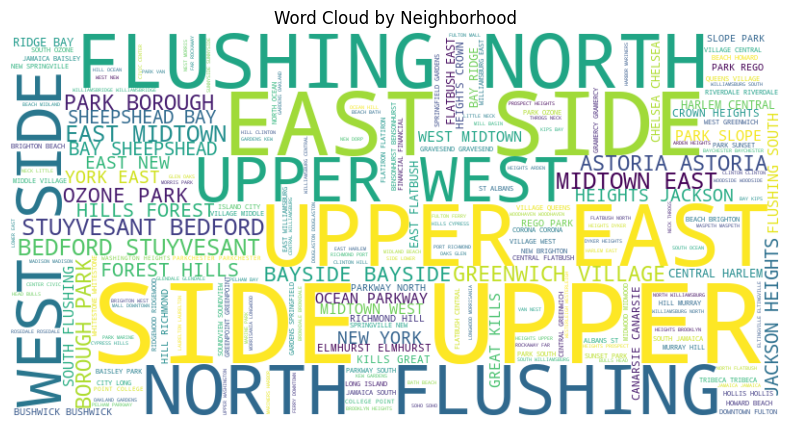

In [21]:
# Word Cloud by Neighborhood
text = ' '.join(df['NEIGHBORHOOD'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud by Neighborhood')
plt.show()

### Average Sale Prices by Year Built (Without Outliers)

- This boxplot shows the distribution of sale prices based on the year the properties were built.
- Outliers have been removed to present a cleaner view of the data, making it easier to identify 
trends or variations in prices for properties built in different years.
- The boxplot helps highlight the median, interquartile range, and potential price changes over time.

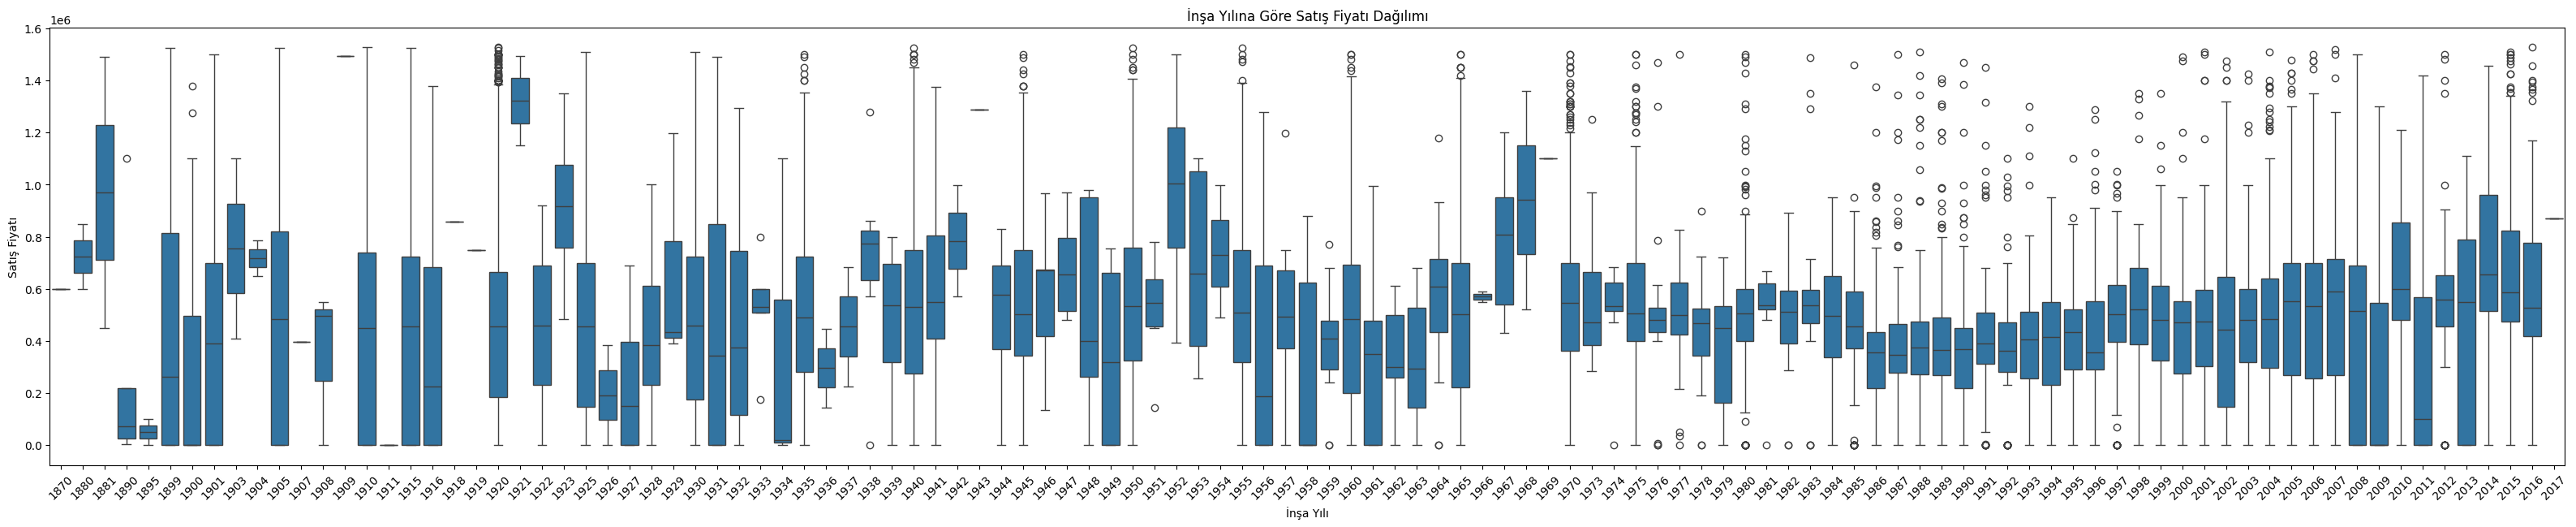

In [22]:
#  Average Sale Prices Without Outliers
plt.figure(figsize=(40, 7))
sns.boxplot(x='YEAR BUILT', y='SALE PRICE', data=clean_df)
plt.title('Average Sale Prices by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Prices')
plt.xticks(rotation=45)
plt.show()

### Average Sale Prices by Year Built (Including Outliers)

- This line chart displays the average sale prices of properties by the year they were built.
- Unlike previous plots, outliers are included here, which may impact the overall average values 
and provide insights into the variation of property prices over time.
- The line plot shows trends, allowing for easy identification of years with significant 
price increases or decreases, as well as long-term price trends.

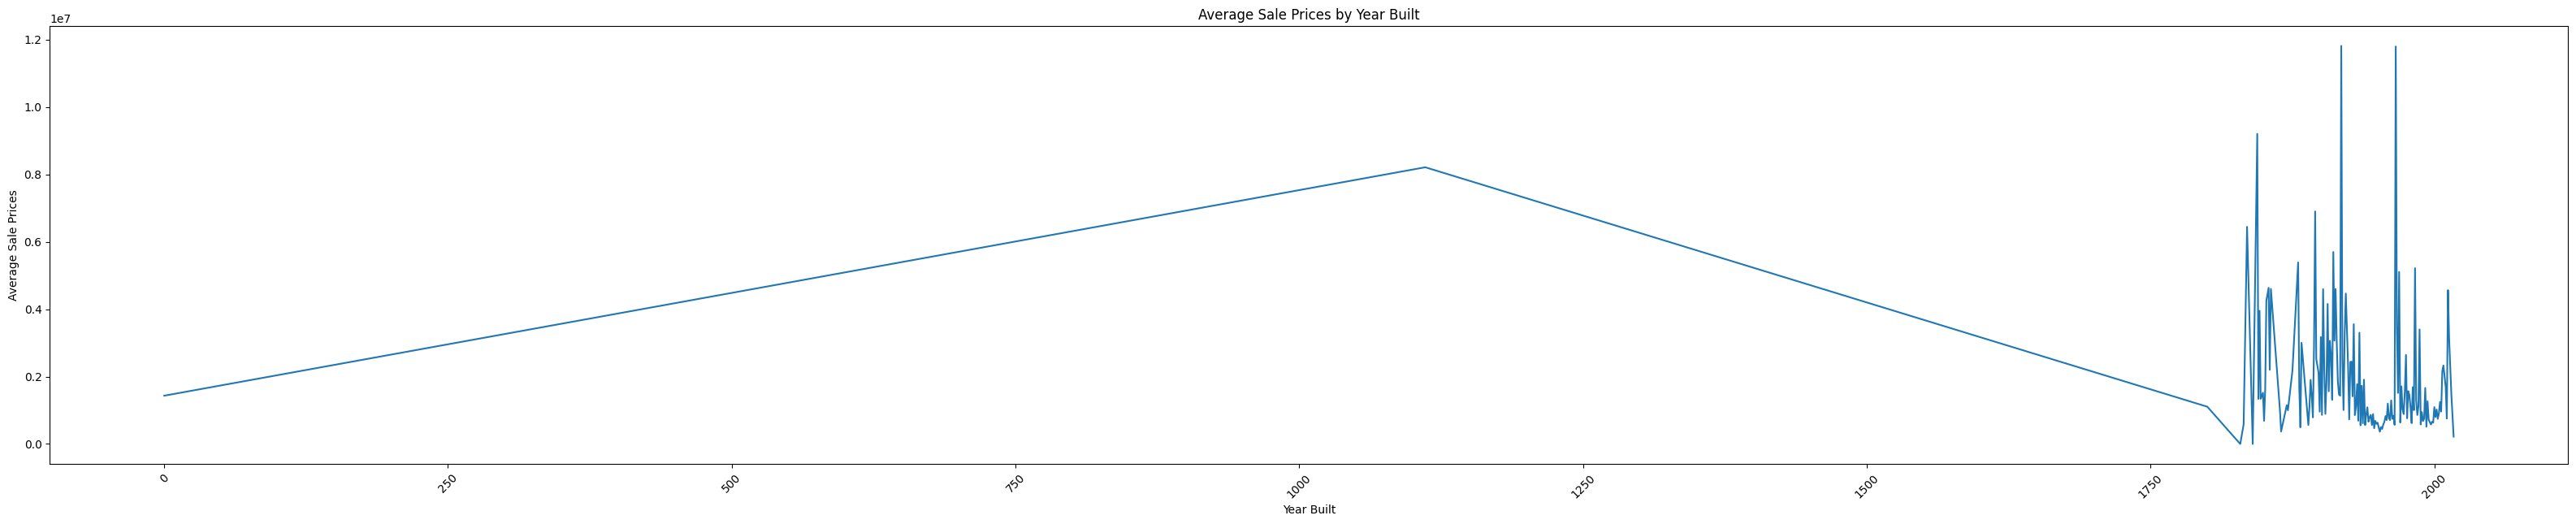

In [23]:
# Mean prices with outlier
plt.figure(figsize=(40, 7))
avg_prices = df.groupby('YEAR BUILT')['SALE PRICE'].mean().reset_index()
sns.lineplot(x='YEAR BUILT', y='SALE PRICE', data=avg_prices)
plt.title('Average Sale Prices by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Prices')
plt.xticks(rotation=45)
plt.show()

### Correlation Matrix

- This heatmap visualizes the correlation matrix for the numeric variables in the dataset.
- It helps in identifying the strength and direction of relationships between different numerical 
features. Positive correlations are shown in warmer colors (red), while negative correlations 
are in cooler colors (blue). 
- Annotating the matrix provides exact correlation values, which are 
essential for feature selection and understanding the relationships between variables

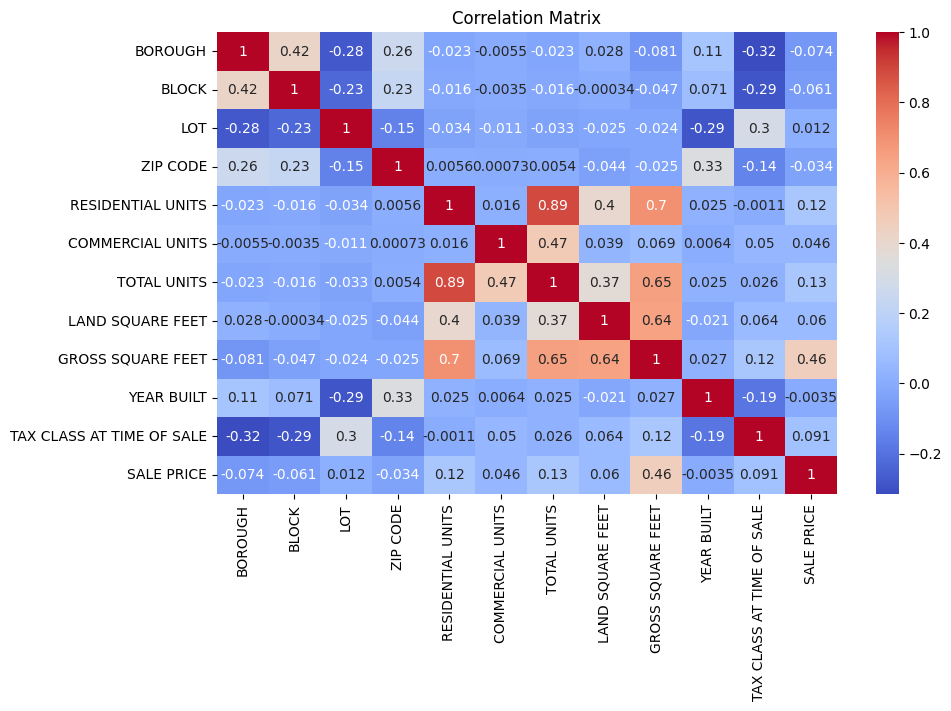

In [24]:
# Correlation Matrix (Among Numeric Variables)
plt.figure(figsize=(10, 6))
correlation = df[numeric_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Distribution of 'LAND SQUARE FEET' and 'GROSS SQUARE FEET'

- This histogram compares the distribution of 'LAND SQUARE FEET' and 'GROSS SQUARE FEET' variables.
- Both distributions are plotted with kernel density estimates (KDE) to show the overall spread and smoothness of the data. 
- The chart allows for easy comparison of these two variables, helping to 
identify any differences or similarities in the property sizes. 
- The color-coded legend helps distinguish between the two variables for better clarity.

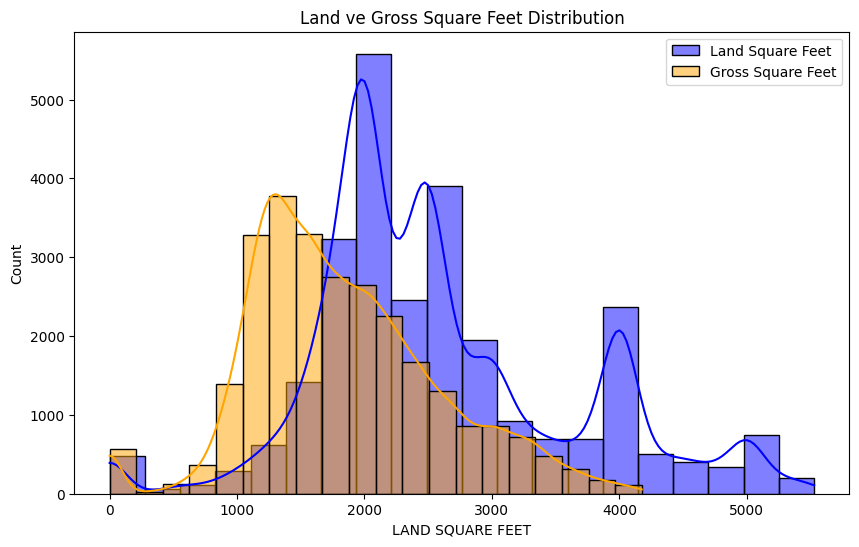

In [25]:
# Distribution of 'LAND SQUARE FEET' and 'GROSS SQUARE FEET'
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['LAND SQUARE FEET'], color='blue', label='Land Square Feet', kde=True, bins=20)
sns.histplot(clean_df['GROSS SQUARE FEET'], color='orange', label='Gross Square Feet', kde=True, bins=20)
plt.title('Land ve Gross Square Feet Distribution')
plt.legend()
plt.show()

### Average Sale Prices by Building Class Category

- This bar chart visualizes the average sale price for properties based on the 'BUILDING CLASS CATEGORY'.
- The data is grouped by building class, and the mean sale price for each class is calculated.
- By sorting the categories in descending order, the chart highlights which building classes 
have higher or lower average sale prices, providing insights into how property class affects value.

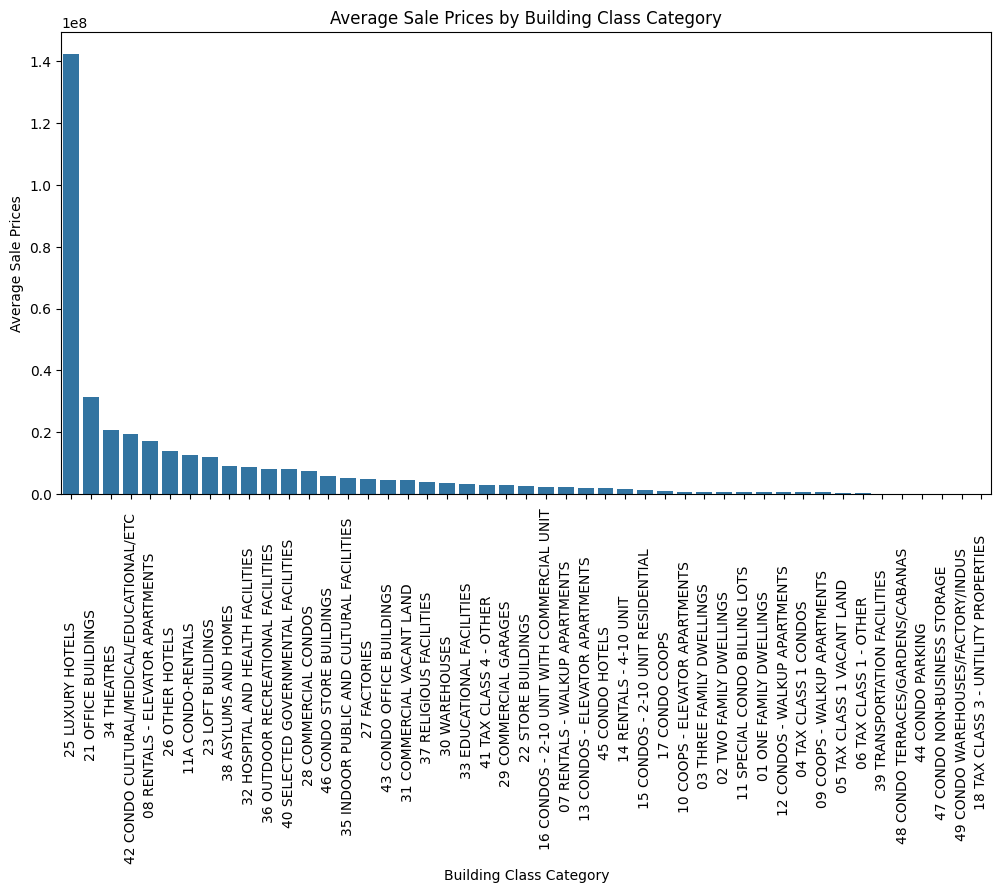

In [26]:
# Average Sale Prices by Building Class Category
building_class_avg_price = df.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=building_class_avg_price.index, y=building_class_avg_price.values)
plt.title('Average Sale Prices by Building Class Category')
plt.xticks(rotation=90)
plt.xlabel('Building Class Category')
plt.ylabel('Average Sale Prices')
plt.show()


### Relationship Between Sale Price and Price Per Unit (Price Per Unit = SALE PRICE / TOTAL UNITS)

- This scatter plot visualizes the relationship between the overall sale price of properties 
and their price per unit (calculated as SALE PRICE / TOTAL UNITS).
- Each point represents a property, and the chart helps to identify any patterns or correlations 
between the total sale price and the price per unit.
- This analysis is useful to understand how the unit count impacts the price-per-unit valuation.

C:\Users\Mehmet Buğra Kara\AppData\Local\Temp\ipykernel_17704\1563160711.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='price_per_unit', y='SALE PRICE', data=df, palette='cool', s=100)


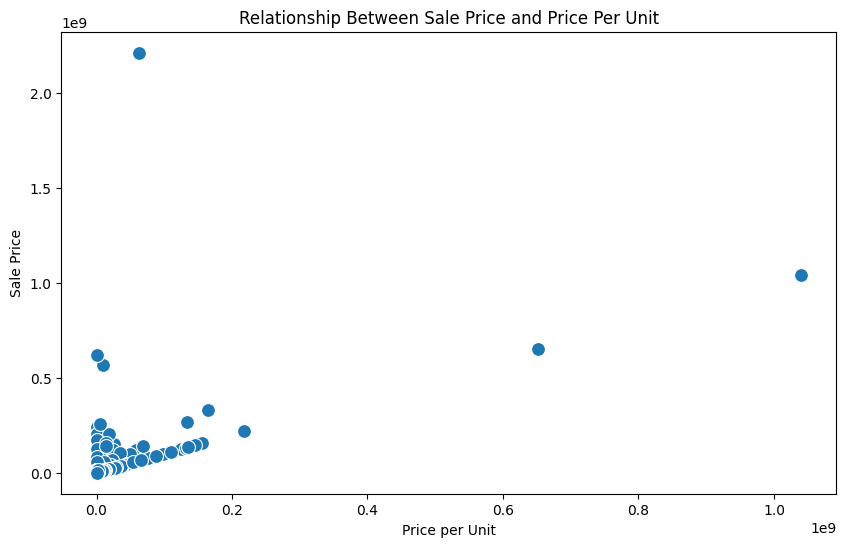

In [27]:
# Relationship Between Sale Price and Price Per Unit (Price Per Unit = SALE PRICE / TOTAL UNITS)
df['price_per_unit'] = df['SALE PRICE'] / df['TOTAL UNITS']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_per_unit', y='SALE PRICE', data=df, palette='cool', s=100)
plt.title('Relationship Between Sale Price and Price Per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Sale Price')
plt.show()

### Regression Line Showing the Relationship Between Total Units and Sale Price

- This plot shows the relationship between the total number of units and the sale price of properties.
- A regression line is added to the scatter plot to visualize the trend or correlation between the two variables.
- The red regression line helps in identifying whether there is a positive or negative linear relationship 
between the total units and sale price. The scatter plot points represent individual properties.

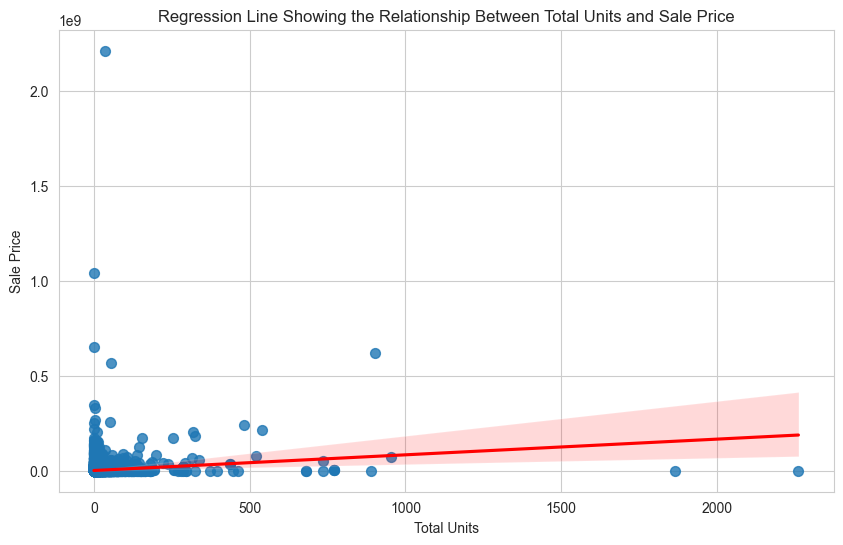

In [48]:
# Regression Line Showing the Relationship Between Total Units and Sale Price
plt.figure(figsize=(10, 6))
sns.regplot(x='TOTAL UNITS', y='SALE PRICE', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Regression Line Showing the Relationship Between Total Units and Sale Price')
plt.xlabel('Total Units')
plt.ylabel('Sale Price')
plt.show()

### Relationship Between Total Units and  Sale Price 

- This code groups the data by 'TOTAL UNITS', counts the occurrences of 'SALE PRICE' for each group,
and sorts the groups in descending order based on the number of sale prices. 
- It then creates a box plot to visualize the relationship between 'TOTAL UNITS' and 'SALE PRICE'.

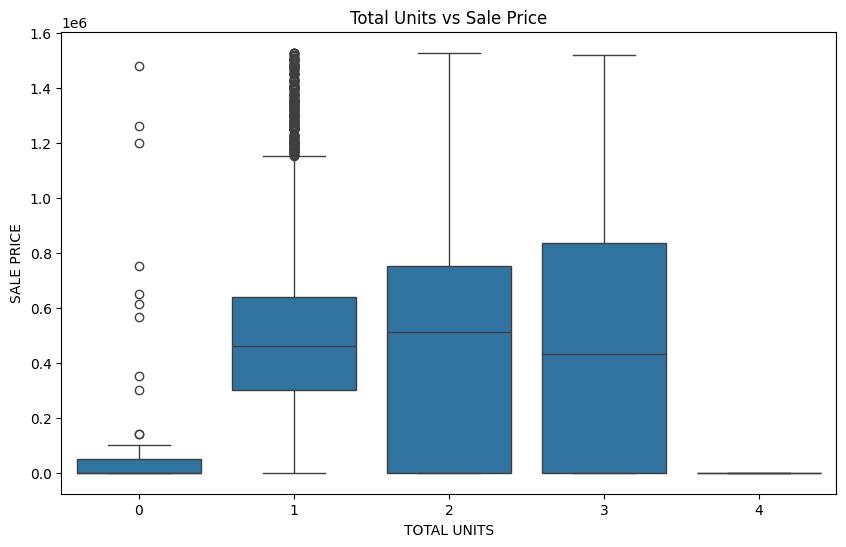

In [29]:
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)
plt.figure(figsize=(10,6))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=clean_df)
plt.title('Total Units vs Sale Price')
plt.show()

### Sale Price Distribution by Borough

- This code generates a box plot to visualize the distribution of sale prices across different boroughs.
- The box plot helps to identify the spread, median, and outliers of sale prices for each borough.

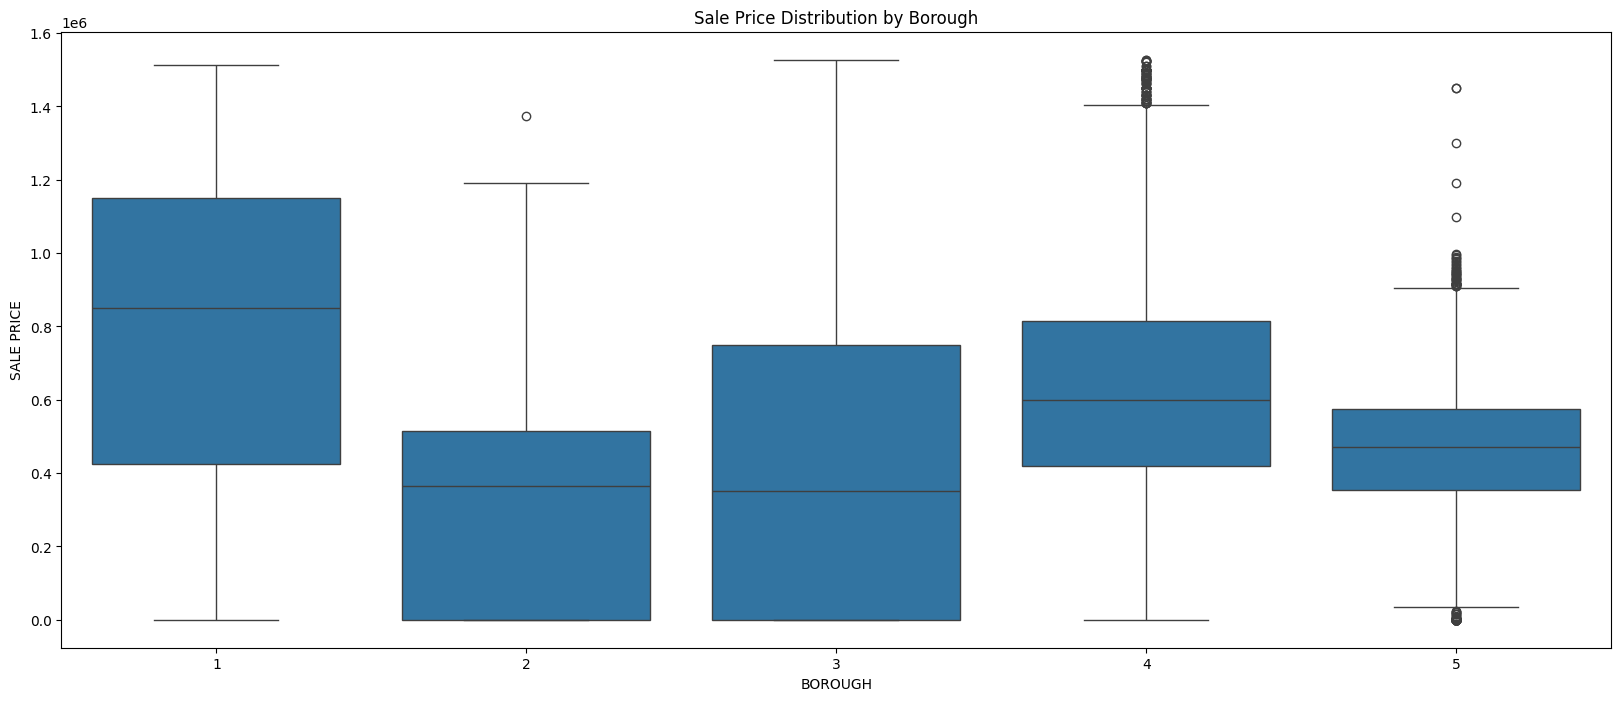

In [30]:
plt.subplots(figsize=(20,8))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=clean_df)
plt.title('Sale Price Distribution by Borough')
plt.show()

### Relationship Between The Number of Commercial Units and The Sale Price

This code filters the dataset based on several conditions:
- COMMERCIAL UNITS less than 20
- TOTAL UNITS less than 50
- SALE PRICE between 100,000 and 5,000,000
- GROSS SQUARE FEET greater than 0

After filtering, it creates a box plot to visualize the relationship between the number of commercial units and the sale price.

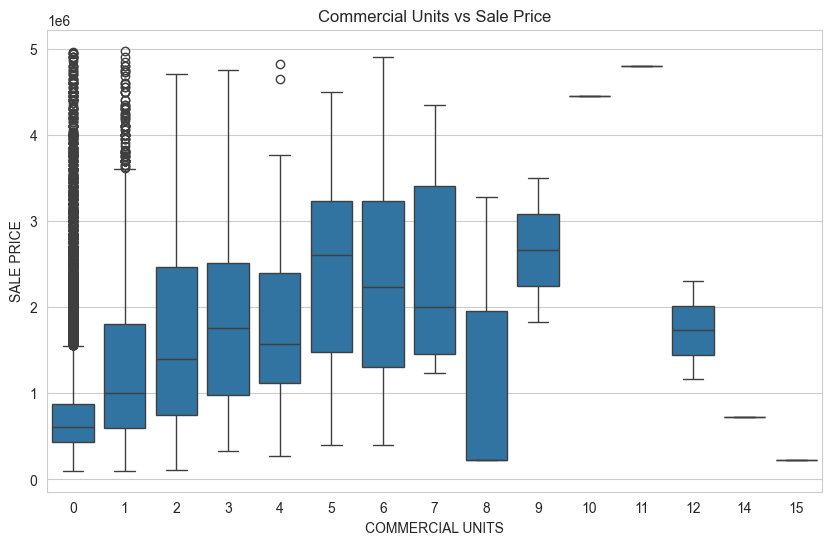

In [46]:
dataset = df[(df['COMMERCIAL UNITS']<20) & (df['TOTAL UNITS']<50) & (df['SALE PRICE']<5000000) & (df['SALE PRICE']>100000) & (df['GROSS SQUARE FEET']>0)]
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=dataset)
plt.title('Commercial Units vs Sale Price')
plt.show()

### Relationship Between Residential Units vs Sale Price

- This code generates a box plot to visualize the relationship between the number of residential units
and the sale price. 
- The box plot helps to understand the distribution, median, and outliers of sale prices
based on the number of residential units.

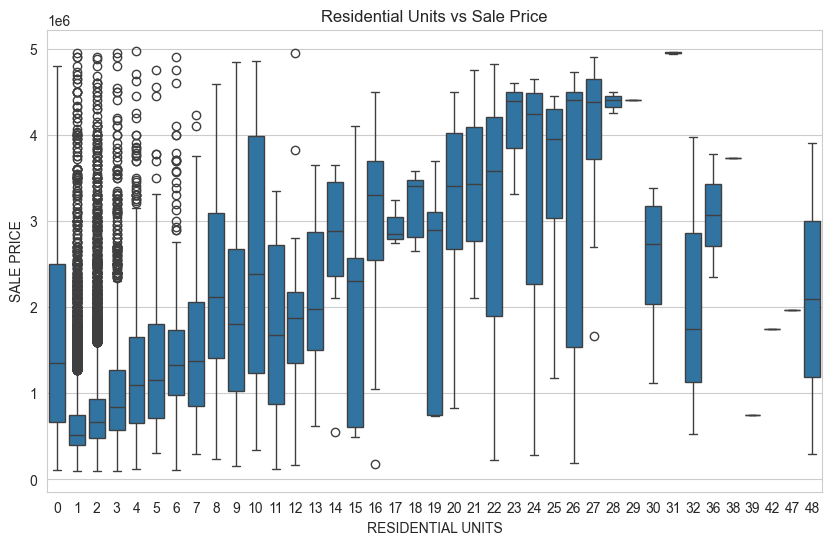

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=dataset)
plt.title('Residential Units vs Sale Price')
plt.show()

### Relationship Median Sale Price by Tax Class

- This code creates a pivot table to calculate the median sale price for each 'TAX CLASS AT PRESENT'.
- It then generates a bar plot to visualize the median sale price for each tax class.

C:\Users\Mehmet Buğra Kara\AppData\Local\Temp\ipykernel_17704\2040340921.py:1: FutureWarning: The provided callable <function median at 0x00000202CCC12280> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pivot=df.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)


<Axes: xlabel='TAX CLASS AT PRESENT'>

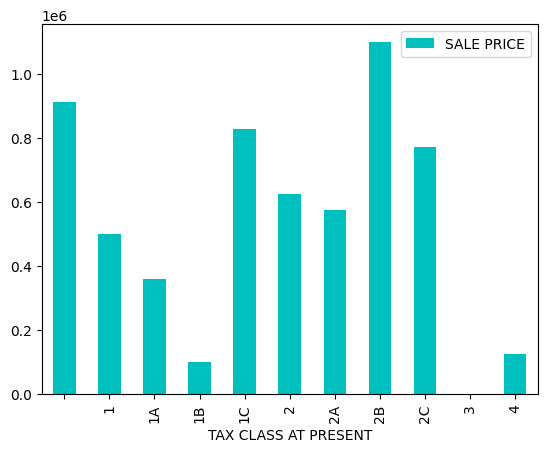

In [34]:
pivot=df.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)
pivot.plot(kind='bar',color="c")

### Relationship Between Median Sale Price by Tax Class at Time of Sale

- This code creates a pivot table to calculate the median sale price for each 'TAX CLASS AT TIME OF SALE'.
- It then generates a bar plot to visualize the median sale price for each tax class at the time of sale.

C:\Users\Mehmet Buğra Kara\AppData\Local\Temp\ipykernel_17704\3004263571.py:1: FutureWarning: The provided callable <function median at 0x00000202CCC12280> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pivot1=df.pivot_table(index="TAX CLASS AT TIME OF SALE", values='SALE PRICE', aggfunc=np.median)


<Axes: xlabel='TAX CLASS AT TIME OF SALE'>

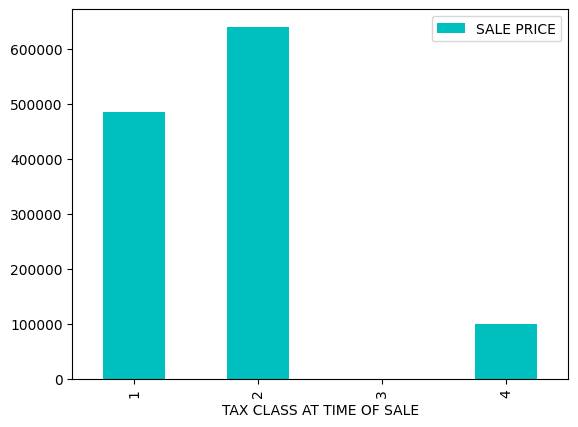

In [35]:
pivot1=df.pivot_table(index="TAX CLASS AT TIME OF SALE", values='SALE PRICE', aggfunc=np.median)
pivot1.plot(kind='bar',color="c")

### Extracting Key Features from Sale Date (Year, Month, Day, Day of Week)

This code creates new features based on the 'SALE DATE' column, such as:

- 'year_sold': The year the property was sold.

- 'month_sold': The month the property was sold.

- 'day_sold': The exact day the property was sold.

- 'day_of_week_sold': The day of the week the property was sold (0 = Monday, 6 = Sunday).

These features can be useful for time-based analysis or to observe trends in property sales over time.

In [50]:
# Extracting Key Features from Sale Date (Year, Month, Day, Day of Week)
df['year_sold'] = df['SALE DATE'].dt.year
df['month_sold'] = df['SALE DATE'].dt.month
df['day_sold'] = df['SALE DATE'].dt.day
df['day_of_week_sold'] = df['SALE DATE'].dt.dayofweek 

### Average Sale Price by Year

- This line plot visualizes the average sale price of properties over the years.
- By grouping the data by 'year_sold', it calculates the mean sale price for each year.
- The line plot helps to observe trends or fluctuations in property prices over time, 
highlighting years with significant price increases or decreases.

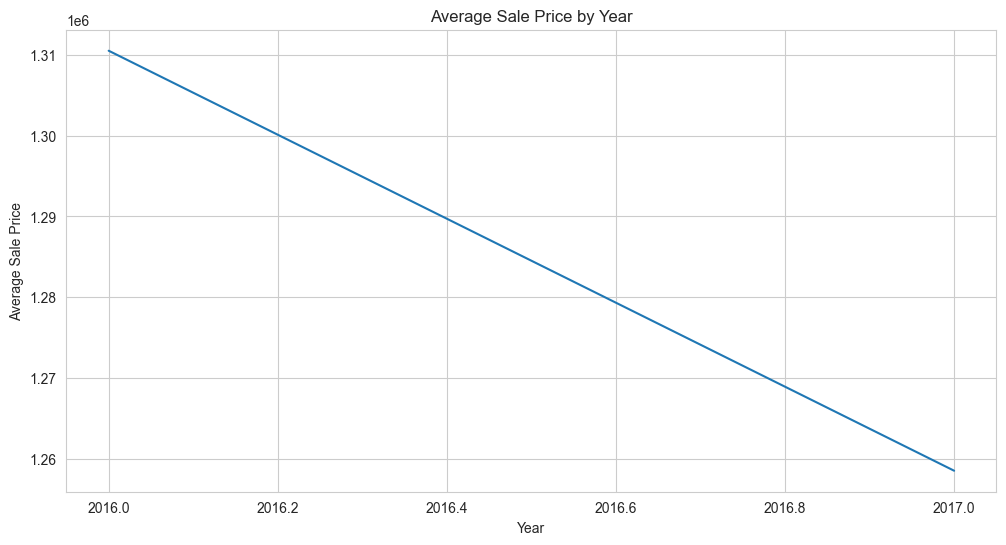

In [51]:
# Average Sale Price by Year
plt.figure(figsize=(12, 6))
yearly_avg_price = df.groupby('year_sold')['SALE PRICE'].mean()
sns.lineplot(x=yearly_avg_price.index, y=yearly_avg_price.values)
plt.title('Average Sale Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.show()

### Average Sale Price by Month (Seasonality Effect)

- This line plot visualizes the average sale price of properties across different months.
- By grouping the data by 'month_sold', the mean sale price for each month is calculated.
- The plot is used to observe the seasonal effect on property prices, highlighting any 
potential trends or fluctuations throughout the year. 
- Markers are added to indicate monthly average prices, and month names are labeled for clarity.

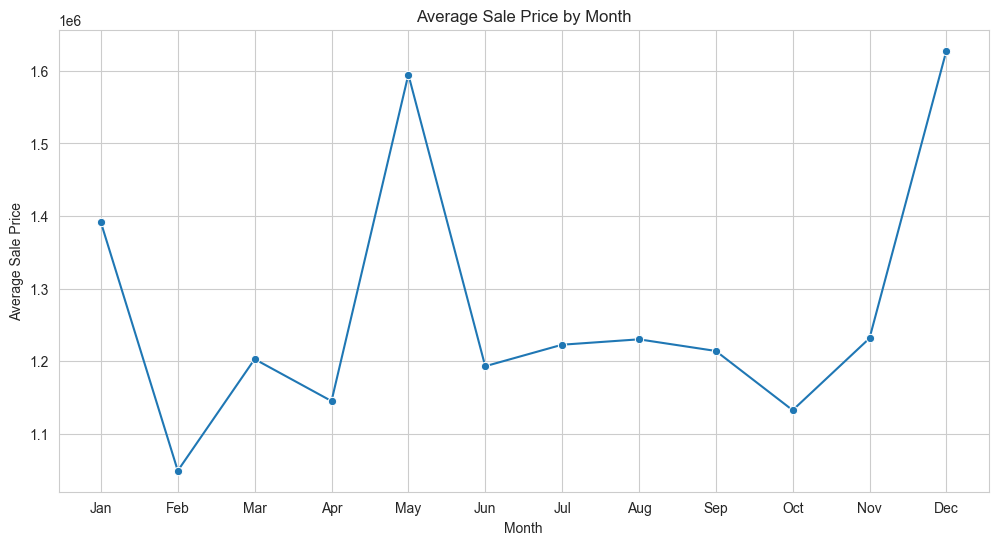

In [52]:
# Average Sale Price by Month (Seasonality Effect)
plt.figure(figsize=(12, 6))
monthly_avg_price = df.groupby('month_sold')['SALE PRICE'].mean()
sns.lineplot(x=monthly_avg_price.index, y=monthly_avg_price.values, marker="o")
plt.title('Average Sale Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Sale Price')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


### Polar Plot for Seasonal Changes in Sale Prices

- This polar plot visualizes the seasonal changes in average sale prices by month.
- The data is grouped by 'month_sold' to calculate the mean sale price for each month.
- A polar plot is used to emphasize the cyclical nature of the data, providing a unique way 
to observe seasonal trends. 
- The line plot and shaded area help highlight the fluctuations 
in sale prices throughout the year, with month labels around the circle for clarity.

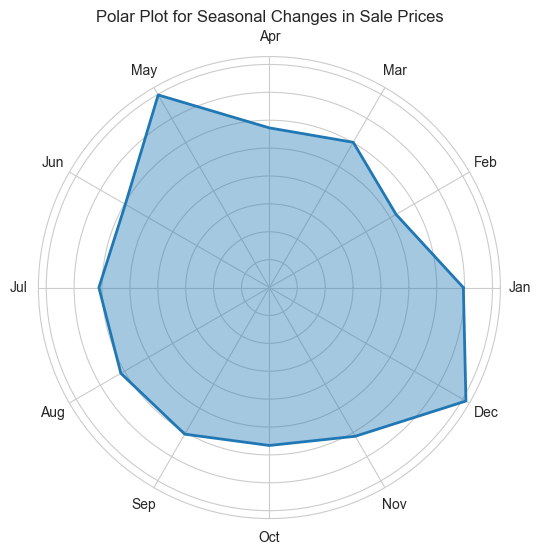

In [54]:
# Polar Plot for Seasonal Changes in Sale Prices
monthly_sales_polar = df.groupby('month_sold')['SALE PRICE'].mean()
angles = np.linspace(0, 2 * np.pi, len(monthly_sales_polar), endpoint=False).tolist()
monthly_sales_polar = pd.concat([monthly_sales_polar, monthly_sales_polar[:1]])
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, monthly_sales_polar, linewidth=2, linestyle='solid')
ax.fill(angles, monthly_sales_polar, alpha=0.4)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Polar Plot for Seasonal Changes in Sale Prices')
plt.show()

### Average Sale Price by Day of the Week

- This bar plot visualizes the average sale price of properties for each day of the week.
- By grouping the data by 'day_of_week_sold', the mean sale price is calculated for each day (0 = Monday, 6 = Sunday).
- The bar plot helps to identify any patterns or trends in property sales based on the day of the week.

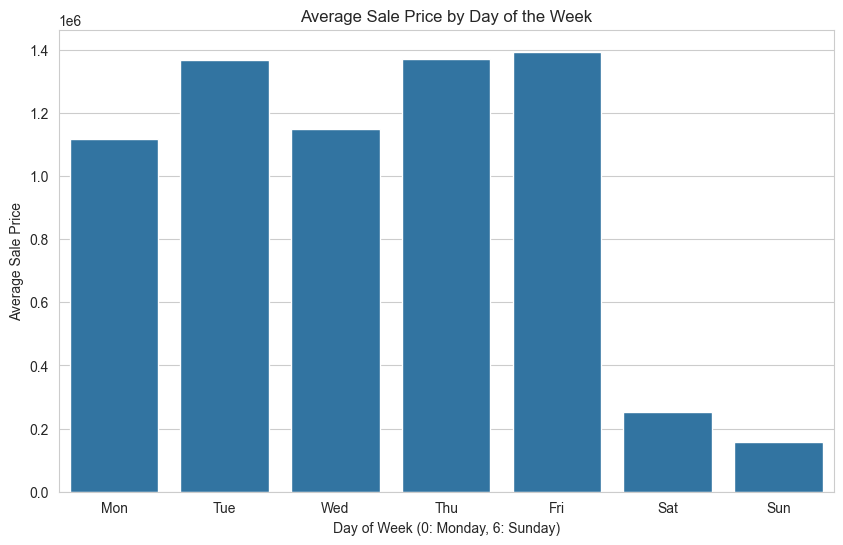

In [55]:
# Average Sale Price by Day of the Week
plt.figure(figsize=(10, 6))
day_of_week_avg_price = df.groupby('day_of_week_sold')['SALE PRICE'].mean()
sns.barplot(x=day_of_week_avg_price.index, y=day_of_week_avg_price.values)
plt.title('Average Sale Price by Day of the Week')
plt.xlabel('Day of Week (0: Monday, 6: Sunday)')
plt.ylabel('Average Sale Price')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

### Time-Based Trend Analysis of Sale Prices (Rolling Average)

- This line plot visualizes the trend of sale prices over time using a 30-day rolling average.
- By setting the 'SALE DATE' as the index and applying a rolling window of 30 days, 
the plot smooths out short-term fluctuations and highlights longer-term trends in property prices.
- This approach helps in identifying consistent patterns or shifts in the market over time.

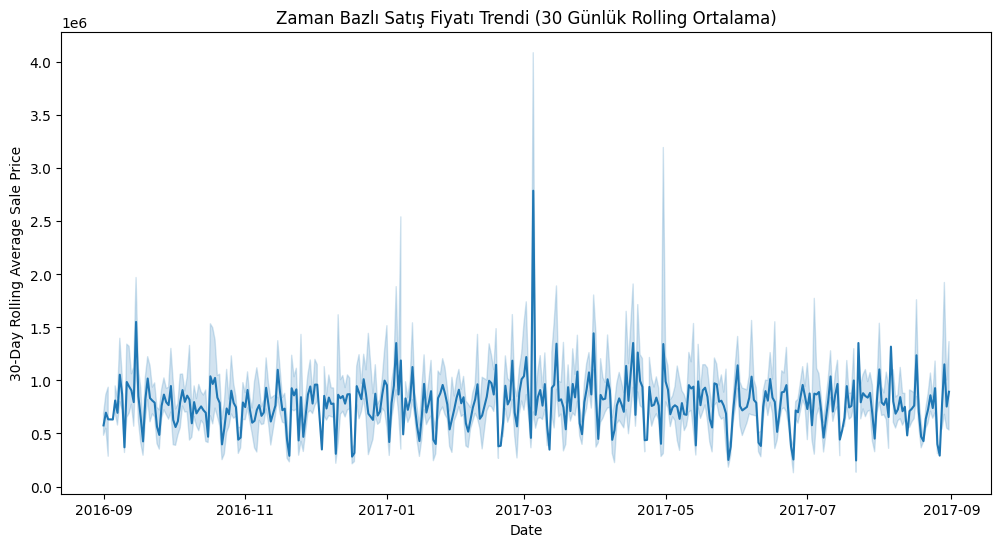

In [219]:
# Time-Based Trend Analysis of Sale Prices (Rolling Average)
plt.figure(figsize=(12, 6))
df.set_index('SALE DATE', inplace=True)
rolling_avg = df['SALE PRICE'].rolling(window=30).mean()
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values)
plt.title('Time-Based Trend Analysis of Sale Prices (30-Day Rolling Average)')
plt.xlabel('Date')
plt.ylabel('30-Day Rolling Average Sale Price')
plt.show()
